In [95]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import random 
import os 
import pandas as pd 

from work import handler
from work import casestudy
from work import storm_tracker
from work.ml_tools.standard_scaler_from_ds import scale_profiles
from work.plots.hist import simple_hist

settings_path = 'settings/sam3d.yaml'

hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
st = storm_tracker.StormTracker(cs, overwrite_storms = False, overwrite = False, verbose = True) #overwrite = True is super long, computes growth rate (triangle fit)

Data loaded from /homedata/mcarenso/shear/SAM3d_Tropics/var_id_days_i_t.json
Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 0.17 seconds


In [96]:
duration_min = 6  # or 10
surfmaxkm2_min = 10000  # or other value
region_latmin, region_latmax, region_lonmin, region_lonmax = -15, 30, -180, 180
filename_save = f"profile_dataset_storms_dmin{duration_min}_smin{surfmaxkm2_min}_lat{region_latmin}_{region_latmax}_lon{region_lonmin}_{region_lonmax}.nc"
storms_path = os.path.join(st.settings["DIR_DATA_OUT"], cs.name, filename_save)
ds = xr.open_dataset(storms_path)

In [97]:
temp_init = ds["TABS_init_profile"]
temp_max = ds["TABS_max_instant_profile"]

528 DCS before TABS bug
[398 399] fucked TABS init bug
[353 373 374 397 426] fucked TABS max bug


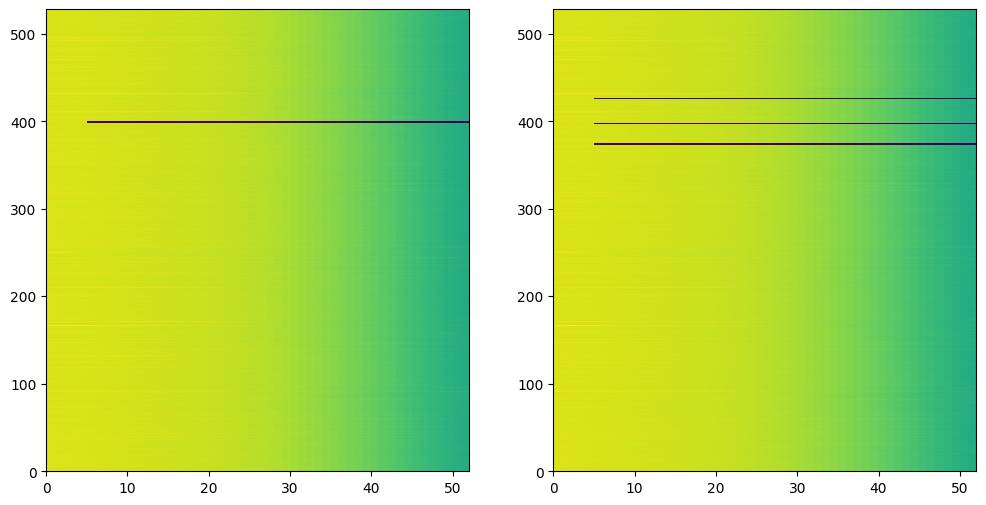

In [107]:
fig, axs = plt.subplots(1,2, figsize = (12,6))
axs[0].pcolormesh(temp_init)
print(temp_init.shape[0], "DCS before TABS bug")
print(np.unique(np.where(temp_init.values==0)[0]), "fucked TABS init bug")
axs[1].pcolormesh(temp_max)
print(np.unique(np.where(temp_max==0)[0]), "fucked TABS max bug")


In [99]:
ds.DCS_number[399]

<xarray.DataArray 'DCS_number' ()>
array(264619)
Coordinates:
    DCS_number  int64 264619